/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.6849 - loss: 0.6653
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.6742 - loss: 0.5003
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.8262 - loss: 0.3977
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.8474 - loss: 0.3835
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.8969 - loss: 0.2944
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.8978 - loss: 0.2679
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.8682 - loss: 0.2817
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9022 - loss: 0.2503
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.9549 - loss: 0.1826
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9599 - loss: 0.1295
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7567 - loss: 0.5643
Test accuracy: 0.7600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Indices of incorrect predi

<ipython-input-2-d918bf754d8f>:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {Y_test[idx]}, Pred: {int(predictions[idx] > 0.5)}")


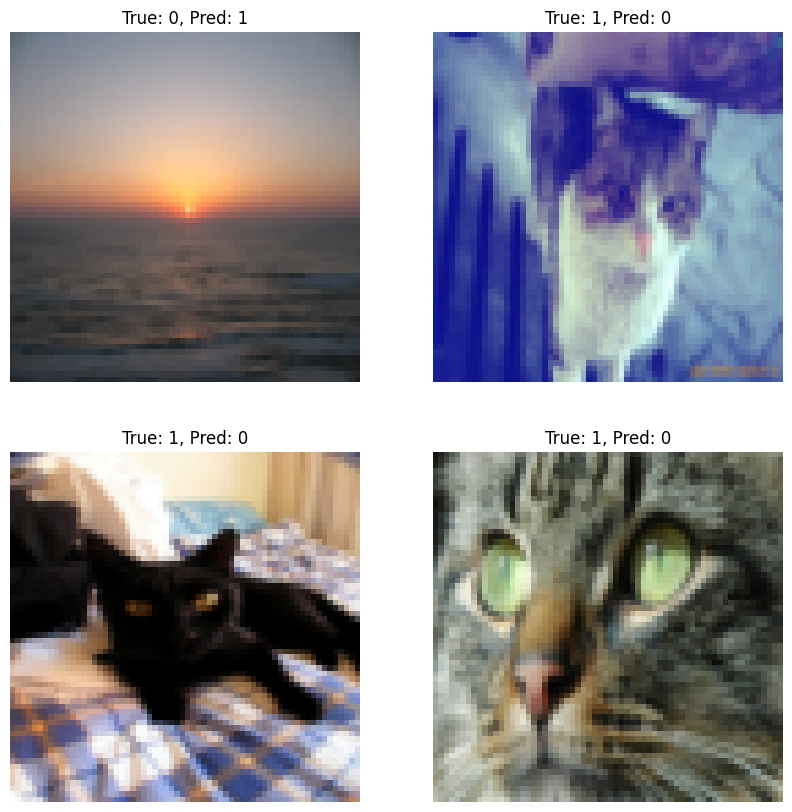

In [2]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Load the training and testing datasets
train_data = h5py.File('train_catvnoncat.h5', 'r')
test_data = h5py.File('test_catvnoncat.h5', 'r')

# Extract images and labels from the datasets
X_train = np.array(train_data['train_set_x'][:])  # Training images
Y_train = np.array(train_data['train_set_y'][:])  # Training labels
X_test = np.array(test_data['test_set_x'][:])    # Testing images
Y_test = np.array(test_data['test_set_y'][:])    # Testing labels

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)

# Output the test accuracy
print(f"Test accuracy: {test_acc:.4f}")

# Predict on the test set
predictions = model.predict(X_test)

# Find the indices of incorrect predictions
incorrect_indices = [i for i in range(len(predictions)) if (predictions[i] > 0.5) != Y_test[i]]

# Output the indices of the failed predictions
print("Indices of incorrect predictions:", incorrect_indices)

# Display the last 4 failed images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[-4:]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {Y_test[idx]}, Pred: {int(predictions[idx] > 0.5)}")
    plt.axis('off')
plt.show()
